# Metrics computation

 ### Volume of comments over time

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset
df = pd.read_csv('../data/raw/charlie_kirk_comments_cleaned.csv', index_col='id', parse_dates=['date'])
df

,id_post,date,score,subreddit,post,comment
id,,,,,,
1,1,2024-11-01,3,democrats,Remember: Your vote is 100% confidential. No o...,Should be illegal to straight up lie like that...
2,2,2024-11-01,1291,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,Brent Terhune trolls the hell out of the Garba...
3,2,2024-11-01,341,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,This video on his TikTok has nearly a million ...
4,2,2024-11-01,244,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,Nobody ever accused Kirk of being the sharpest...
5,2,2024-11-01,148,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,They are upset that they got called garbage by...
...,...,...,...,...,...,...
8052,205,2025-10-15,1,politics,JB Pritzker Compares Trump’s ICE Crackdown to ...,So you believe they will eventually stop bothe...
8053,205,2025-10-15,1,politics,JB Pritzker Compares Trump’s ICE Crackdown to ...,Your go-to example actually did get a hearing ...
8054,205,2025-10-15,1,politics,JB Pritzker Compares Trump’s ICE Crackdown to ...,"Hahahahahha, yeah, they also did a great job i..."


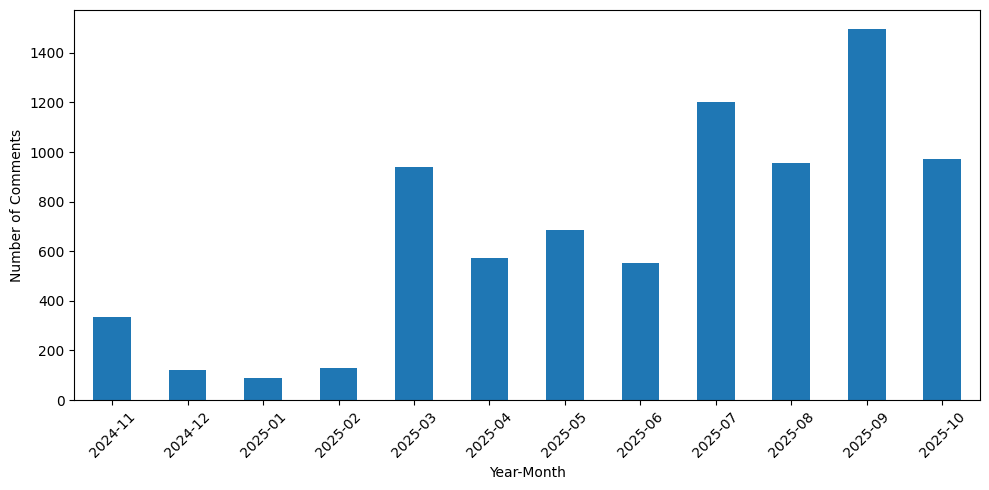

In [6]:
# Volume over time

df['year_month'] = df['date'].dt.to_period('M').astype(str)
counts = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
counts.plot.bar()
plt.xlabel('Year-Month')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
df['year_month'] = df['date'].dt.to_period('M').astype(str)
df['count_month'] = df.groupby('year_month')['year_month'].transform('count')
df.drop(columns=['year_month'], inplace=True)

### Average sentiment

In [8]:
# check for gpu
import torch
torch.cuda.is_available()

True

In [9]:
from transformers import pipeline
from statistics import mode

# load models for sentiment analysis
siebert_sentiment = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english", truncation=True)
bertweet_sentiment = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis", truncation=True)
cardiff_sentiment = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest", truncation=True)

c:\Users\david\miniconda3\envs\sentiment_analysis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cuda:0
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cuda:0
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the check

In [10]:
# compute sentiment analysis 
def get_sentiment(text, model_pipeline):
    result = model_pipeline(str(text)[:512])[0]
    return result['label'], result['score']

df['siebert_label'], df['siebert_score'] = zip(*df['comment'].apply(lambda x: get_sentiment(x, siebert_sentiment)))
df['bertweet_label'], df['bertweet_score'] = zip(*df['comment'].apply(lambda x: get_sentiment(x, bertweet_sentiment)))
df['cardiff_label'], df['cardiff_score'] = zip(*df['comment'].apply(lambda x: get_sentiment(x, cardiff_sentiment)))

df

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


,id_post,date,score,subreddit,post,comment,count_month,siebert_label,siebert_score,bertweet_label,bertweet_score,cardiff_label,cardiff_score
id,,,,,,,,,,,,,
1,1,2024-11-01,3,democrats,Remember: Your vote is 100% confidential. No o...,Should be illegal to straight up lie like that...,337,NEGATIVE,0.999483,NEG,0.981502,negative,0.941520
2,2,2024-11-01,1291,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,Brent Terhune trolls the hell out of the Garba...,337,POSITIVE,0.998305,NEG,0.668998,negative,0.548198
3,2,2024-11-01,341,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,This video on his TikTok has nearly a million ...,337,POSITIVE,0.992450,NEU,0.638176,neutral,0.491072
4,2,2024-11-01,244,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,Nobody ever accused Kirk of being the sharpest...,337,NEGATIVE,0.999388,NEG,0.951419,negative,0.804607
5,2,2024-11-01,148,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,They are upset that they got called garbage by...,337,NEGATIVE,0.999279,NEG,0.959742,negative,0.928648
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,205,2025-10-15,1,politics,JB Pritzker Compares Trump’s ICE Crackdown to ...,So you believe they will eventually stop bothe...,973,NEGATIVE,0.996580,NEG,0.910753,neutral,0.692203
8053,205,2025-10-15,1,politics,JB Pritzker Compares Trump’s ICE Crackdown to ...,Your go-to example actually did get a hearing ...,973,NEGATIVE,0.998147,NEG,0.815059,negative,0.683629
8054,205,2025-10-15,1,politics,JB Pritzker Compares Trump’s ICE Crackdown to ...,"Hahahahahha, yeah, they also did a great job i...",973,NEGATIVE,0.994977,NEG,0.632005,positive,0.477221


In [11]:
def normalize_label(label):
    label = str(label).strip().upper()
    if label in ['POS', 'POSITIVE']:
        return 'POSITIVE'
    elif label in ['NEG', 'NEGATIVE']:
        return 'NEGATIVE'
    elif label in ['NEU', 'NEUTRAL']:
        return 'NEUTRAL'
    else:
        return 'NEUTRAL'

def consensus_sentiment(row):
    labels = [
        normalize_label(row['siebert_label']),
        normalize_label(row['bertweet_label']),
        normalize_label(row['cardiff_label'])
    ]
    scores = [row['siebert_score'], row['bertweet_score'], row['cardiff_score']]
    label_counts = pd.Series(labels).value_counts()
    most_common_label = label_counts.index[0]
    count_common = label_counts.iloc[0]
    if count_common >= 2:
        mean_score = sum(sc for lbl, sc in zip(labels, scores) if lbl == most_common_label) / count_common
        final_label = most_common_label
    else:
        max_index = scores.index(max(scores))
        final_label = labels[max_index]
        mean_score = scores[max_index]
    return final_label, mean_score

df[['sentiment_label', 'sentiment_score']] = df.apply(lambda row: pd.Series(consensus_sentiment(row)), axis=1)

label_map = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
df['sentiment_num'] = df['sentiment_label'].map(label_map).astype(int)

cols_to_drop = [
    'siebert_label', 'siebert_score',
    'bertweet_label', 'bertweet_score',
    'cardiff_label', 'cardiff_score',
    'sentiment_label'
]

df.drop(columns=cols_to_drop, inplace=True)

In [12]:
df['year_month'] = df['date'].dt.to_period('M').astype(str)


mean_sentiment_by_month = df.groupby('year_month')['sentiment_num'].mean().to_dict()

df['mean_sentiment_month'] = df['year_month'].map(mean_sentiment_by_month)

In [13]:
df.drop(columns=['year_month'], inplace=True)
df

,id_post,date,score,subreddit,post,comment,count_month,sentiment_score,sentiment_num,mean_sentiment_month
id,,,,,,,,,,
1,1,2024-11-01,3,democrats,Remember: Your vote is 100% confidential. No o...,Should be illegal to straight up lie like that...,337,0.974169,0,0.599407
2,2,2024-11-01,1291,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,Brent Terhune trolls the hell out of the Garba...,337,0.608598,0,0.599407
3,2,2024-11-01,341,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,This video on his TikTok has nearly a million ...,337,0.564624,1,0.599407
4,2,2024-11-01,244,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,Nobody ever accused Kirk of being the sharpest...,337,0.918471,0,0.599407
5,2,2024-11-01,148,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,They are upset that they got called garbage by...,337,0.962556,0,0.599407
...,...,...,...,...,...,...,...,...,...,...
8052,205,2025-10-15,1,politics,JB Pritzker Compares Trump’s ICE Crackdown to ...,So you believe they will eventually stop bothe...,973,0.953667,0,0.326824
8053,205,2025-10-15,1,politics,JB Pritzker Compares Trump’s ICE Crackdown to ...,Your go-to example actually did get a hearing ...,973,0.832278,0,0.326824
8054,205,2025-10-15,1,politics,JB Pritzker Compares Trump’s ICE Crackdown to ...,"Hahahahahha, yeah, they also did a great job i...",973,0.813491,0,0.326824


### Topic distribution


100%|██████████| 9/9 [10:46<00:00, 71.82s/it]


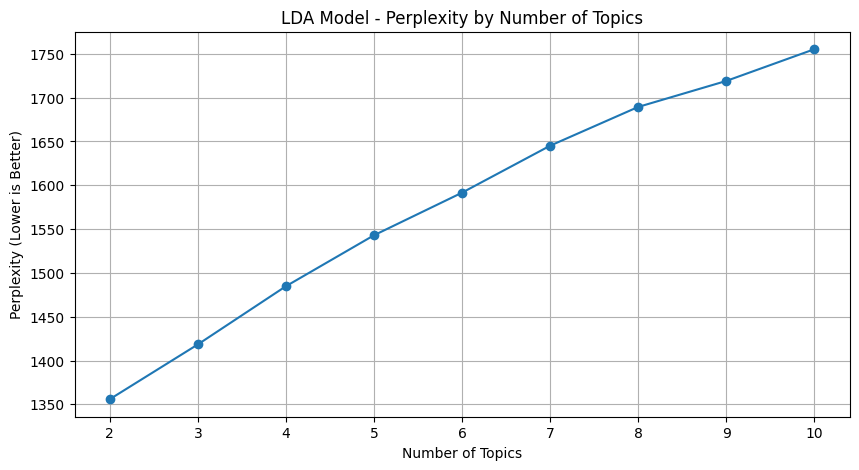

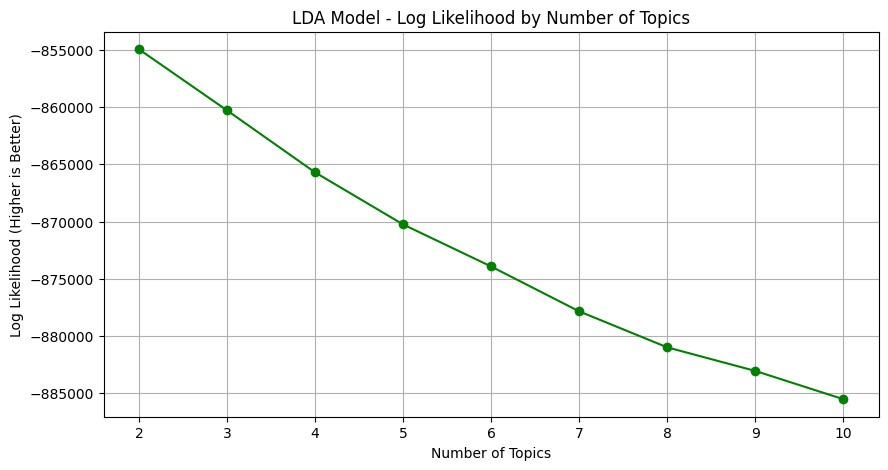

In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from tqdm import tqdm

df['year_month'] = df['date'].dt.to_period('M').astype(str)
texts = df['comment'].astype(str).tolist()

vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=10,
    stop_words='english'
)
X = vectorizer.fit_transform(texts)

topic_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

perplexities = []
log_likelihoods = []

for n_topics in tqdm(topic_range):
    lda = LatentDirichletAllocation(
        n_components=n_topics,
        max_iter=25,
        learning_method='online',
        n_jobs=-1,
        random_state=0
    )
    lda.fit(X)
    log_likelihoods.append(lda.score(X))
    perplexities.append(lda.perplexity(X))

plt.figure(figsize=(10,5))
plt.plot(topic_range, perplexities, marker='o')
plt.title('LDA Model - Perplexity by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity (Lower is Better)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(topic_range, log_likelihoods, marker='o', color='green')
plt.title('LDA Model - Log Likelihood by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Log Likelihood (Higher is Better)')
plt.grid(True)
plt.show()

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 3

vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=10,
    stop_words='english'
)
X = vectorizer.fit_transform(df['comment'].astype(str))

lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=25,
    learning_method='online',
    n_jobs=-1,
    random_state=0,
    verbose=1
)
lda.fit(X)

doc_topics = lda.transform(X)
df['topic_id'] = doc_topics.argmax(axis=1)

df['year_month'] = df['date'].dt.to_period('M').astype(str)
topic_distribution = (
    df.groupby(['year_month', 'topic_id'])
      .size()
      .groupby(level=0)
      .apply(lambda x: x / x.sum())
      .unstack(fill_value=0)
)


df.drop(columns=['year_month'], inplace=True)

iteration: 1 of max_iter: 25
iteration: 2 of max_iter: 25
iteration: 3 of max_iter: 25
iteration: 4 of max_iter: 25
iteration: 5 of max_iter: 25
iteration: 6 of max_iter: 25
iteration: 7 of max_iter: 25
iteration: 8 of max_iter: 25
iteration: 9 of max_iter: 25
iteration: 10 of max_iter: 25
iteration: 11 of max_iter: 25
iteration: 12 of max_iter: 25
iteration: 13 of max_iter: 25
iteration: 14 of max_iter: 25
iteration: 15 of max_iter: 25
iteration: 16 of max_iter: 25
iteration: 17 of max_iter: 25
iteration: 18 of max_iter: 25
iteration: 19 of max_iter: 25
iteration: 20 of max_iter: 25
iteration: 21 of max_iter: 25
iteration: 22 of max_iter: 25
iteration: 23 of max_iter: 25
iteration: 24 of max_iter: 25
iteration: 25 of max_iter: 25


In [16]:
df.topic_id.value_counts()

topic_id
1    3462
0    3010
2    1584
Name: count, dtype: int64

In [17]:
no_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    print(f"🟢 Topic {topic_idx}: {', '.join(top_words)}")

🟢 Topic 0: people, like, just, trump, don, trans, white, say, want, think
🟢 Topic 1: like, just, kirk, people, right, charlie, don, left, think, know
🟢 Topic 2: kirk, trump, charlie, did, post, american, life, point, president, yes


**Diversidad léxica**

In [18]:
import numpy as np
import re
from collections import Counter

df['year_month'] = df['date'].dt.to_period('M').astype(str)

def shannon_entropy(texts):
    all_text = ' '.join(texts).lower()
    words = re.findall(r'\b\w+\b', all_text)
    if not words:
        return 0
    freqs = np.array(list(Counter(words).values()))
    probs = freqs / freqs.sum()
    return -np.sum(probs * np.log2(probs))

entropy_by_month = (
    df.groupby('year_month')['comment']
      .apply(shannon_entropy)
      .reset_index(name='lexical_entropy_month')
)

entropy_map = dict(zip(entropy_by_month['year_month'], entropy_by_month['lexical_entropy_month']))
df['lexical_entropy_month'] = df['year_month'].map(entropy_map)

df.drop(columns=['year_month'], inplace=True)

In [19]:
df

,id_post,date,score,subreddit,post,comment,count_month,sentiment_score,sentiment_num,mean_sentiment_month,topic_id,lexical_entropy_month
id,,,,,,,,,,,,
1,1,2024-11-01,3,democrats,Remember: Your vote is 100% confidential. No o...,Should be illegal to straight up lie like that...,337,0.974169,0,0.599407,2,9.254898
2,2,2024-11-01,1291,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,Brent Terhune trolls the hell out of the Garba...,337,0.608598,0,0.599407,2,9.254898
3,2,2024-11-01,341,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,This video on his TikTok has nearly a million ...,337,0.564624,1,0.599407,1,9.254898
4,2,2024-11-01,244,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,Nobody ever accused Kirk of being the sharpest...,337,0.918471,0,0.599407,2,9.254898
5,2,2024-11-01,148,PoliticalHumor,Charlie Kirk falls for fake Garbage Driver Bre...,They are upset that they got called garbage by...,337,0.962556,0,0.599407,0,9.254898
...,...,...,...,...,...,...,...,...,...,...,...,...
8052,205,2025-10-15,1,politics,JB Pritzker Compares Trump’s ICE Crackdown to ...,So you believe they will eventually stop bothe...,973,0.953667,0,0.326824,1,9.528032
8053,205,2025-10-15,1,politics,JB Pritzker Compares Trump’s ICE Crackdown to ...,Your go-to example actually did get a hearing ...,973,0.832278,0,0.326824,2,9.528032
8054,205,2025-10-15,1,politics,JB Pritzker Compares Trump’s ICE Crackdown to ...,"Hahahahahha, yeah, they also did a great job i...",973,0.813491,0,0.326824,1,9.528032


In [20]:
df['year_month'] = df['date'].dt.to_period('M').astype(str)

# Eliminamos columnas textuales que ya no se necesitan
df = df.drop(columns=['post', 'comment', 'subreddit'], errors='ignore')

# Agrupamos por mes y calculamos los valores agregados
df_monthly = (
    df.groupby('year_month', as_index=False)
      .agg({
          'count_month': 'mean',               # Volumen mensual promedio
          'sentiment_score': 'mean',           # Intensidad media del sentimiento
          'sentiment_num': 'mean',             # Polaridad media (0=neg,1=neu,2=pos)
          'mean_sentiment_month': 'mean',      # Promedio mensual del sentimiento
          'lexical_entropy_month': 'mean',     # Entropía léxica mensual
          'topic_id': lambda x: x.mode()[0] if not x.mode().empty else None  # Tópico predominante
      })
)

df

,id_post,date,score,count_month,sentiment_score,sentiment_num,mean_sentiment_month,topic_id,lexical_entropy_month,year_month
id,,,,,,,,,,
1,1,2024-11-01,3,337,0.974169,0,0.599407,2,9.254898,2024-11
2,2,2024-11-01,1291,337,0.608598,0,0.599407,2,9.254898,2024-11
3,2,2024-11-01,341,337,0.564624,1,0.599407,1,9.254898,2024-11
4,2,2024-11-01,244,337,0.918471,0,0.599407,2,9.254898,2024-11
5,2,2024-11-01,148,337,0.962556,0,0.599407,0,9.254898,2024-11
...,...,...,...,...,...,...,...,...,...,...
8052,205,2025-10-15,1,973,0.953667,0,0.326824,1,9.528032,2025-10
8053,205,2025-10-15,1,973,0.832278,0,0.326824,2,9.528032,2025-10
8054,205,2025-10-15,1,973,0.813491,0,0.326824,1,9.528032,2025-10


In [21]:
df.to_csv('../data/processed/charlie_kirk_comments_processed.csv')